In [1]:
import random
import pyspark as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
spark = ps.sql.SparkSession.builder\
        .master('local[4]')\
        .appName('Homework3')\
        .getOrCreate()
sc = spark.sparkContext

In [3]:
def TwoDiceRoll(n):
    d1=DiceRoll(n)
    d2=DiceRoll(n)
    dsum=[i+j for i,j in zip(d1, d2)]
    return dsum

In [4]:
def DiceRoll(n):
    x=[random.randint(1,6) for _ in range(n)]
    return x

In [5]:
num=100

In [6]:
d1=DiceRoll(num)

In [7]:
d2=DiceRoll(num)

In [8]:
dsum=TwoDiceRoll(num)

In [9]:
print(d1, "\n", d2, "\n", dsum)

[6, 1, 1, 6, 4, 6, 6, 1, 4, 3, 2, 4, 3, 6, 5, 3, 2, 5, 1, 2, 2, 3, 5, 3, 1, 3, 4, 2, 5, 2, 6, 6, 6, 6, 6, 1, 6, 5, 4, 6, 4, 6, 2, 4, 5, 5, 1, 2, 1, 6, 2, 4, 1, 6, 6, 2, 1, 5, 4, 4, 4, 5, 3, 1, 5, 3, 4, 6, 1, 3, 5, 4, 1, 5, 3, 5, 5, 2, 2, 2, 2, 5, 2, 4, 5, 1, 5, 5, 3, 2, 3, 4, 1, 3, 5, 6, 1, 4, 1, 5] 
 [1, 4, 5, 6, 2, 2, 2, 6, 6, 6, 4, 5, 5, 1, 3, 1, 6, 1, 2, 6, 3, 5, 6, 3, 5, 5, 1, 1, 1, 3, 4, 4, 4, 6, 3, 4, 5, 5, 1, 4, 5, 3, 1, 3, 3, 2, 4, 3, 6, 2, 4, 2, 6, 2, 4, 2, 2, 6, 4, 3, 3, 3, 6, 4, 5, 4, 2, 3, 1, 1, 6, 5, 4, 5, 1, 1, 5, 6, 3, 3, 4, 5, 2, 2, 6, 2, 6, 4, 5, 3, 2, 5, 6, 4, 3, 6, 2, 4, 6, 6] 
 [9, 11, 6, 5, 12, 3, 6, 7, 3, 7, 8, 4, 6, 9, 8, 11, 6, 6, 4, 8, 4, 6, 6, 8, 4, 5, 5, 9, 7, 6, 7, 2, 11, 4, 3, 6, 10, 4, 7, 3, 8, 5, 9, 11, 3, 5, 5, 6, 7, 5, 9, 8, 3, 9, 4, 9, 6, 9, 6, 9, 7, 4, 6, 7, 6, 4, 6, 7, 6, 8, 2, 3, 7, 6, 10, 2, 5, 4, 9, 11, 6, 5, 5, 3, 11, 11, 9, 10, 5, 5, 6, 11, 8, 9, 9, 10, 8, 8, 10, 9]


In [10]:
data=(d1, d2, dsum)

In [11]:
rdd = sc.parallelize(data)

In [12]:
columns = ['Dice_1', 'Dice_2', 'Sum']

In [13]:
rdd1 = rdd.collect()

In [14]:
df = spark.createDataFrame(rdd1, columns)

In [15]:
df.show()

+------+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+
|Dice_1|Dice_2|Sum| _4| _5| _6| _7| _8| _9|_10|_11|_12|_13|_14|_15|_16|_17|_18|_19|_20|_21|_22|_23|_24|_25|_26|_27|_28|_29|_30|_31|_32|_33|_34|_35|_36|_37|_38|_39|_40|_41|_42|_43|_44|_45|_46|_47|_48|_49|_50|_51|_52|_53|_54|_55|_56|_57|_58|_59|_60|_61|_62|_63|_64|_65|_66|_67|_68|_69|_70|_71|_72|_73|_74|_75|_76|_77|_78|_79|_80|_81|_82|_83|_84|_85|_86|_87|_88|_89|_90|_91|_92|_93|_94|_95|_96|_97|_98|_99|_100|
+------+------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---

(array([ 3.,  8., 10., 12., 19., 10., 10., 14.,  5.,  9.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 10 artists>)

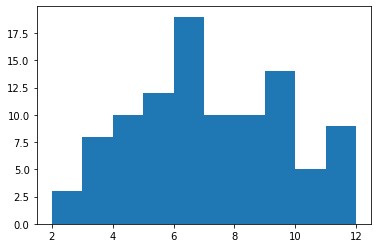

In [16]:
plt.hist(dsum)

In [17]:
from zipfile import ZipFile

In [19]:
zipObj = ZipFile('Homework3.zip', 'w')

In [20]:
zipObj.write('Homework#3.ipynb')

In [21]:
zipObj.close()